In [72]:
import pandas as pd
%matplotlib inline

In [56]:
df = pd.read_json("results/data.json")

In [57]:
workers = pd.read_csv("results/worker_ids.csv")

In [58]:
workers.head()

,WorkerId,WorkTimeInSeconds,Answer.surveycode
0,ALZVG5501Y5IX,101,1534534922960
1,A2CJYS92WX7HN6,748,1534538301234
2,A1PTH9KTRO06EG,505,1534538449525
3,AG7C4X3WKKBV,440,1534539633143
4,AKQPDAOVGFB91,767,1534535596251


In [59]:
df.columns.values

array(['UrlChanges', 'comments', 'highUrlChanges', 'interaction',
       'lowUrlChanges', 'medUrlChanges', 'mode', 'model', 'pop_time',
       'postId', 'question1', 'question2', 'question3', 'question4',
       'question5', 'response', 'time_diff_build', 'time_diff_experiment',
       'time_diff_explore', 'time_diff_strategy', 'time_diff_training',
       'time_end_build', 'time_end_experiment', 'time_end_explore',
       'time_end_strategy', 'time_end_training', 'time_start_build',
       'time_start_experiment', 'time_start_explore',
       'time_start_strategy', 'time_start_training', 'timestamp',
       'workerId'], dtype=object)

In [60]:
# required fields
ids = ['timestamp','postId','workerId','mode']

# interactions
inter = ['timestamp','postId','workerId','mode','interaction','UrlChanges', 'highUrlChanges', 
       'lowUrlChanges', 'medUrlChanges', 'model', 'pop_time']

# questions
qs = ['timestamp','postId','workerId','mode',
      'question1', 'question2', 'question3', 'question4', 'question5',
      'comments', 'response']

# timing
time = ['timestamp','postId','workerId','mode','time_diff_build', 'time_diff_experiment',
       'time_diff_explore', 'time_diff_strategy', 'time_diff_training',
       'time_end_build', 'time_end_experiment', 'time_end_explore',
       'time_end_strategy', 'time_end_training', 'time_start_build',
       'time_start_experiment', 'time_start_explore',
       'time_start_strategy', 'time_start_training']

In [61]:
# get only results of approved workers
ws = workers['WorkerId'].drop_duplicates().sort_values()
res = df[df['workerId'].isin(ws)]
res.shape

(1000, 33)

In [ ]:
# check provided survey codes against postIds in system
res[res['interaction'] == 'SUBMIT SUCCESFUL'][ids].sort_values('workerId')

In [68]:
# check for bad surveycode
# tmp = df[df['workerId']=='A1V2H0UF94ATWY']
# tmp[tmp['interaction']=='SUBMIT SUCCESFUL']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000004D1567DB38>]], dtype=object)

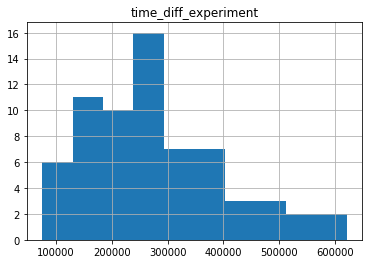

In [73]:
res[time].dropna(subset=['time_diff_experiment']).hist('time_diff_experiment')

In [81]:
# for q in ['question1', 'question2', 'question3', 'question4', 'question5']:
#     res[qs].dropna(subset=[q]).plot.bar(x = [-2, -1, 0, 1, 2], y=q)

In [24]:
ws.shape

(29,)

In [10]:
df[inter].sort_values("timestamp")

,timestamp,postId,workerId,mode,interaction,UrlChanges,highUrlChanges,lowUrlChanges,medUrlChanges,model,pop_time
336,2018-08-17 19:15:33.953,jkydiyf5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,2018-08-17 19:15:34.210,1534533333415,NaN,List,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,2018-08-17 19:22:07.949,1534533719854,TEST,List,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,2018-08-17 19:22:18.778,1534533737485,TEST,List,ADD,[21],NaN,NaN,NaN,,0.0
286,2018-08-17 19:22:18.967,1534533737658,TEST,List,ADD,[21],NaN,NaN,NaN,,631.0
302,2018-08-17 19:22:20.033,1534533739082,TEST,List,ADD,"[21, 171]",NaN,NaN,NaN,,631.0
196,2018-08-17 19:22:23.199,1534533742194,TEST,List,REMOVE,[21],NaN,NaN,NaN,,631.0
121,2018-08-17 19:22:25.358,1534533744206,TEST,List,ADD,"[21, 86]",NaN,NaN,NaN,,631.0
93,2018-08-17 19:22:26.425,1534533745542,TEST,List,RANK,"[21, 86]",NaN,NaN,NaN,,631.0
94,2018-08-17 19:22:43.068,1534533762009,TEST,List,FINISH,"[21, 86]",NaN,NaN,NaN,,631.0


In [45]:
df[['workerId', 'mode', 'comments', 'interaction', 'UrlChanges', 'time_diff_training', 'time_diff_build','time_diff_explore',
       'time_diff_experiment', 'time_start_experiment',
       'time_start_explore', 'time_start_training',  
       'time_end_build', 'time_end_experiment', 'time_end_explore',
       'time_end_training', 'time_start_build', 'timestamp']].sort_values("timestamp")

,workerId,mode,comments,interaction,UrlChanges,time_diff_training,time_diff_build,time_diff_explore,time_diff_experiment,time_start_experiment,time_start_explore,time_start_training,time_end_build,time_end_experiment,time_end_explore,time_end_training,time_start_build,timestamp
7,HOME_BOY_Q,List,NaN,NaN,NaN,2777,NaN,NaN,NaN,1533213187315,NaN,1533213221684,NaN,1533213187313,NaN,1533213224461,NaN,2018-08-02 12:33:44.469
3,HOME_BOY_Q,List,NaN,ADD,[154],2777,NaN,NaN,NaN,1533213187315,NaN,1533213221684,NaN,1533213187313,NaN,1533213224461,1.533213e+12,2018-08-02 12:33:47.972
5,HOME_BOY_Q,List,NaN,ADD,"[154, 130]",2777,NaN,NaN,NaN,1533213187315,NaN,1533213221684,NaN,1533213187313,NaN,1533213224461,1.533213e+12,2018-08-02 12:34:00.788
2,HOME_BOY_Q,List,NaN,ADD,"[154, 130, 18]",2777,NaN,NaN,NaN,1533213187315,NaN,1533213221684,NaN,1533213187313,NaN,1533213224461,1.533213e+12,2018-08-02 12:34:05.844
0,HOME_BOY_Q,List,NaN,ADD,"[154, 130, 18]",2777,NaN,NaN,NaN,1533213187315,NaN,1533213221684,NaN,1533213187313,NaN,1533213224461,1.533213e+12,2018-08-02 12:34:06.200
4,HOME_BOY_Q,List,NaN,ADD,"[154, 130, 18]",2777,NaN,NaN,NaN,1533213187315,NaN,1533213221684,NaN,1533213187313,NaN,1533213224461,1.533213e+12,2018-08-02 12:34:06.207
8,HOME_BOY_Q,List,NaN,RANK,"[154, 130, 18]",2777,23632.0,NaN,NaN,1533213187315,NaN,1533213221684,1.533213e+12,1533213187313,NaN,1533213224461,1.533213e+12,2018-08-02 12:34:08.155
6,HOME_BOY_Q,List,NaN,FINISH,"[154, 130, 18]",2777,23632.0,100085.0,161009.0,1533213187315,1.533213e+12,1533213221684,1.533213e+12,1533213348324,1.533213e+12,1533213224461,1.533213e+12,2018-08-02 12:35:48.341
9,HOME_BOY_Q,List,test1,FINISH,"[154, 130, 18]",2777,23632.0,100085.0,161009.0,1533213187315,1.533213e+12,1533213221684,1.533213e+12,1533213348324,1.533213e+12,1533213224461,1.533213e+12,2018-08-02 12:36:20.991
1,HOME_BOY_Q,List,test1,FEEDBACK,"[154, 130, 18]",2777,23632.0,100085.0,161009.0,1533213187315,1.533213e+12,1533213221684,1.533213e+12,1533213348324,1.533213e+12,1533213224461,1.533213e+12,2018-08-02 12:36:20.992
